In [150]:
import pandas as pd
import seaborn as srn
import statistics as sts
import matplotlib.pyplot as plt

In [152]:
base = pd.read_csv("DADOS/Churn.csv", sep=";")
base

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


EXPLORANDO OS DADOS E TRATANDO

In [155]:
base.columns = ["id","score","estado","genero","idade","patrimonio","saldo","produtos","cardcreditos","ativo","salario","saiu"]
base

,id,score,estado,genero,idade,patrimonio,saldo,produtos,cardcreditos,ativo,salario,saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


EXCLUINDO DUPLICADOS

In [158]:
base[base.duplicated(subset=["id"] , keep=False)]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,cardcreditos,ativo,salario,saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [160]:
base.drop_duplicates(subset="id", keep="first", inplace=True)

In [162]:
base[base.duplicated(subset=["id"] , keep=False)]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,cardcreditos,ativo,salario,saiu


In [164]:

base["score"].describe()

count    998.000000
mean     648.605210
std       98.312117
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: score, dtype: float64

Text(0.5, 1.0, 'SCORE')

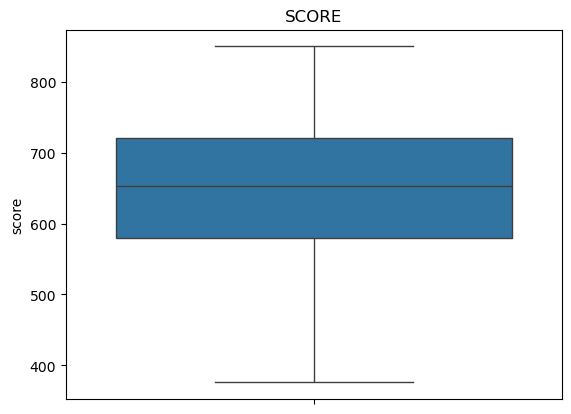

In [166]:
srn.boxplot(base["score"]).set_title("SCORE")

SUBSTITUINDO VALORES PELO MODA 

In [169]:
agrupado = base.groupby("estado").size()
agrupado

estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [171]:
base.loc[base["estado"] == "RP" , "estado"] = "RS"

In [173]:
base.loc[base["estado"] == "SP" , "estado"] = "RS"

In [175]:
base.loc[base["estado"] == "TD", "estado"] = "RS"

In [177]:
agrupado = base.groupby("estado").size()
agrupado

estado
PR    257
RS    483
SC    258
dtype: int64

In [179]:
base.head()

,id,score,estado,genero,idade,patrimonio,saldo,produtos,cardcreditos,ativo,salario,saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


PADRONIZANDO OS DADOS

In [182]:
agrupado = base.groupby("genero").size()
agrupado

genero
F              2
Fem            1
Feminino     460
M              6
Masculino    521
dtype: int64

In [184]:
base.loc[base["genero"] == "F", "genero"] = "Feminino"

In [186]:
base.loc[base["genero"] == "Fem", "genero"] = "Feminino"

In [188]:
base.loc[base["genero"] == "M" , "genero"] = "Masculino"

In [190]:
agrupado = base.groupby("genero").size()
agrupado

genero
Feminino     463
Masculino    527
dtype: int64

RETIRANDO VALORES QUE NAO SAO POSSIVEIS EXISTIR

In [193]:
base["idade"].describe()

count    998.000000
mean      38.907816
std       11.406570
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: idade, dtype: float64

Text(0.5, 1.0, 'IDADE')

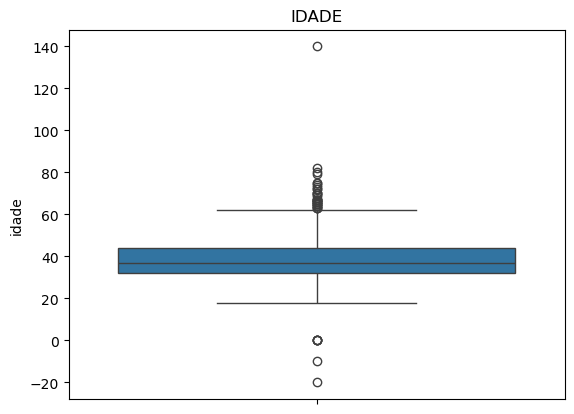

In [195]:
srn.boxplot(base["idade"]).set_title("IDADE")

In [197]:
base.loc[(base["idade"] < 0) | (base["idade"] >120)]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,cardcreditos,ativo,salario,saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [199]:
mediana = sns.median(base["idade"])
mediana

37.0

In [201]:
base.loc[(base["idade"] < 0) | (base["idade"] > 120), "idade"] = mediana


In [203]:
mediana

37.0

In [205]:
base.loc[(base["idade"] < 0) | (base["idade"]> 120)]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,cardcreditos,ativo,salario,saiu


Text(0.5, 1.0, 'IDADE')

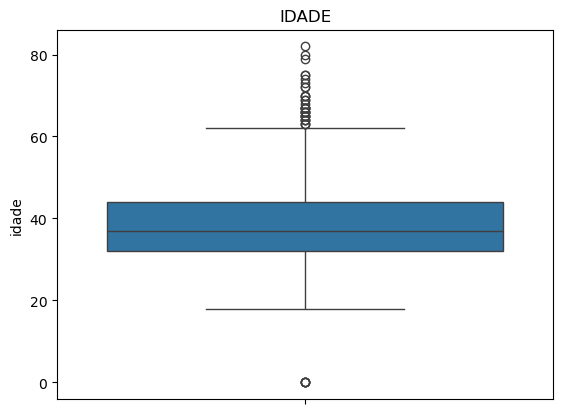

In [207]:
srn.boxplot(base["idade"]).set_title("IDADE")

In [209]:
base["saldo"].describe()

count    9.980000e+02
mean     7.162423e+06
std      6.314508e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.926348e+06
75%      1.258767e+07
max      2.117743e+07
Name: saldo, dtype: float64

Text(0.5, 1.0, 'SALDO')

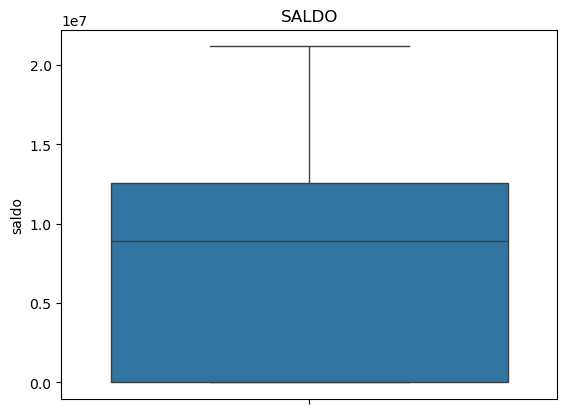

In [211]:
srn.boxplot(base["saldo"]).set_title("SALDO")

OLHANDO OS VALORES MAIORES QUE O DESVIO PADRAO

In [214]:
base["salario"].describe()

count    9.910000e+02
mean     3.530593e+07
std      5.308476e+08
min      9.677000e+03
25%      3.020010e+06
50%      8.695742e+06
75%      1.404604e+07
max      1.193469e+10
Name: salario, dtype: float64

Text(0.5, 1.0, 'SALARIO')

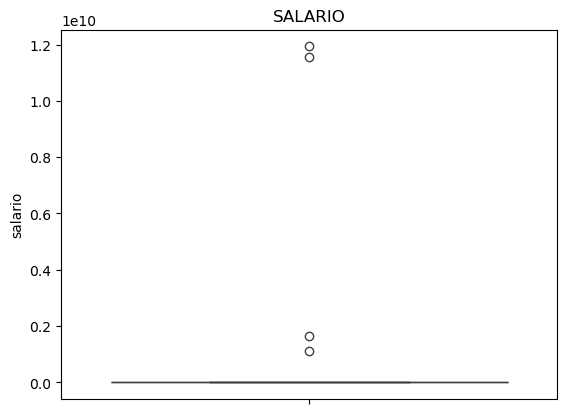

In [216]:
srn.boxplot(base["salario"]).set_title("SALARIO")

ANTES DE CALCULAR O DESVIO PADRAO PRECISAMOS RETIRAS VALORES NULOS

In [229]:
base.isnull().sum()

id              0
score           0
estado          0
genero          8
idade           0
patrimonio      0
saldo           0
produtos        0
cardcreditos    0
ativo           0
salario         7
saiu            0
dtype: int64

In [231]:
mediana  = sts.median(base["salario"])
medianas

73752.0

In [235]:
base["salario"].fillna(mediana,inplace=True)

In [239]:
#GENERO VAMOS SUBSTITUIR PELA MODA

base.fillna({"genero": "Masculino"}, inplace=True)

In [241]:
base.isnull().sum()

id              0
score           0
estado          0
genero          0
idade           0
patrimonio      0
saldo           0
produtos        0
cardcreditos    0
ativo           0
salario         0
saiu            0
dtype: int64

In [243]:
desvio = sts.stdev(base["salario"])
desvio

528988916.9661659

In [245]:
base.loc[base["salario"] >= 2* desvio]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,cardcreditos,ativo,salario,saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [247]:
mediana = sts.median(base["salario"])
mediana

8637195.5

SUBSTITUINDO OS VALORES PELA MEDIANA

In [252]:
base.loc[base["salario"] >= 2* desvio, "salario"] = mediana

In [254]:
base.loc[base["salario"] >= 2* desvio]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,cardcreditos,ativo,salario,saiu


Text(0.5, 1.0, 'SALARIO')

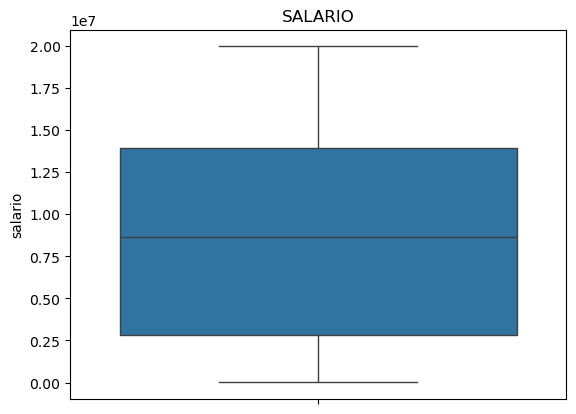

In [256]:
srn.boxplot(base["salario"]).set_title("SALARIO")